# iris案例

## 自定义数据集

我们经常可以看到Pytorch加载数据集会用到官方整理好的数据集。很多时候我们需要加载自己的数据集，这时候我们需要使用Dataset和DataLoader
- Dataset：是被封装进DataLoader里，实现该方法封装自己的数据和标签。
- DataLoader：被封装入DataLoaderIter里，实现该方法达到数据的划分。

### 加载iris数据集

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader

In [2]:
iris = pd.read_csv("D:\\Jupyter notebook\\data\\iris_dataset\\iris.csv",header=None)

In [3]:
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
train_data = np.array(iris.iloc[:,:4])
train_label = np.array(iris.iloc[:,4])

### Dataset

继承该方法必须实现两个方法：
- `_getitem_()`
- `_len_()`

In [5]:
# 定义GetLoader类，继承Dataset方法，并重写__getitem__()和__len__()方法
class GetLoader(torch.utils.data.Dataset):
    # 初始化函数，得到数据
    def __init__(self, data_root, data_label):
        self.data = data_root
        self.label = data_label
    # index是根据batchsize划分数据后得到的索引，最后将data和对应的labels进行一起返回
    def __getitem__(self, index):
        data = self.data[index]
        labels = self.label[index]
        return data, labels
    # 该函数返回数据大小长度，目的是DataLoader方便划分，如果不知道大小，DataLoader会一脸懵逼
    def __len__(self):
        return len(self.data)

In [6]:
torch_data = GetLoader(train_data, train_label)

In [7]:
torch_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
torch_data.label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### DataLoader

提供对Dataset的操作，操作如下：

`torch.utils.data.DataLoader(dataset,batch_size,shuffle,drop_last，num_workers)`

参数含义如下：

- dataset： 加载torch.utils.data.Dataset对象数据
- batch_size： 每个batch的大小
- shuffle：是否对数据进行打乱
- drop_last：是否对无法整除的最后一个datasize进行丢弃
- num_workers：表示加载的时候子进程数

In [9]:
# 读取数据
datas = DataLoader(torch_data, batch_size=50, shuffle=True, drop_last=False)

### 查看数据

In [10]:
for i, data in enumerate(datas):
    # i表示第几个batch， data表示该batch对应的数据，包含data和对应的labels
    print("第 {} 个Batch \n{}".format(i, data))

第 0 个Batch 
[tensor([[6.3000, 2.5000, 5.0000, 1.9000],
        [6.6000, 2.9000, 4.6000, 1.3000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.6000, 2.50

## 训练模型

### 直接构建模型

In [26]:
net = torch.nn.Sequential(
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10,3)
)

In [27]:
net

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=3, bias=True)
)

In [28]:
def get_acc(outputs, labels):
    """计算acc"""
    _, predict = torch.max(outputs.data, 1)
    total_num = labels.shape[0]*1.0
    correct_num = (labels == predict).sum().item()
    acc = correct_num / total_num

    return acc

In [31]:
# 优化器
optim = torch.optim.Adam(net.parameters(), lr=0.0001)

# 损失
loss_fun = nn.CrossEntropyLoss()

In [32]:
# 训练
for e in range(1000):
    epoch_loss = 0
    epoch_acc = 0
    for i, (x, y) in enumerate(datas):
        optim.zero_grad()

        x = torch.as_tensor(x, dtype=torch.float)
        y = torch.as_tensor(y, dtype=torch.long)
        out = net(x)
        loss = loss_fun(out, y)

        loss.backward()
        optim.step()

        epoch_loss += loss.data
        epoch_acc += get_acc(out, y)

    if e % 200 == 0:
        print('epoch: %d, loss: %f, acc: %f' % (e, epoch_loss / 50, epoch_acc / 50))

epoch: 0, loss: 0.030020, acc: 0.050400
epoch: 200, loss: 0.025750, acc: 0.056000
epoch: 400, loss: 0.022585, acc: 0.058000
epoch: 600, loss: 0.019912, acc: 0.058000
epoch: 800, loss: 0.017524, acc: 0.058800


# passengers案例

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

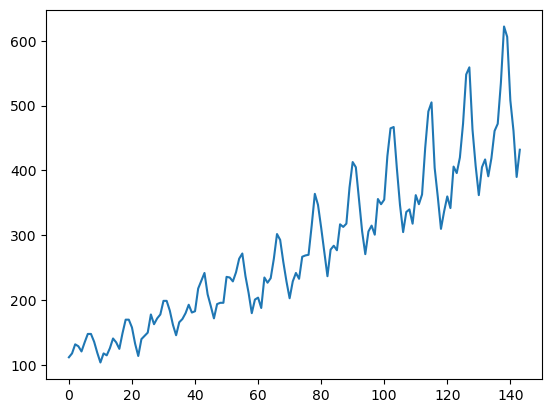

In [6]:
df = pd.read_csv("../data/airline-passengers.csv")
timeseries = df[["Passengers"]].values.astype('float32')
 
plt.plot(timeseries)
plt.show()

In [7]:
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

## 单变量多步预测

In [ ]:
import torch


#多输入单输出预测
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset) - lookback):
        feature = dataset[i:i + lookback]
        target = dataset[i + 1:i + lookback + 1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

## 单变量单步预测

In [10]:
#多输入单输出预测
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window
    """
    X, y = [], []
    for i in range(len(dataset) - lookback):
        feature = dataset[i:i + lookback]
        target = dataset[i + lookback:i + lookback + 1]
        X.append(feature)
        y.append(target)
    return torch.as_tensor(X), torch.as_tensor(y)

In [11]:
lookback = 12
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([84, 12, 1]) torch.Size([84, 1, 1])
torch.Size([36, 12, 1]) torch.Size([36, 1, 1])


In [12]:
import torch.nn as nn

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [14]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 235.9761, test RMSE 435.4907
Epoch 100: train RMSE 192.0565, test RMSE 389.9826
Epoch 200: train RMSE 157.1661, test RMSE 352.8921
Epoch 300: train RMSE 126.9465, test RMSE 319.2674
Epoch 400: train RMSE 102.0200, test RMSE 288.9693
Epoch 500: train RMSE 83.0410, test RMSE 262.2727
Epoch 600: train RMSE 63.7312, test RMSE 231.6472
Epoch 700: train RMSE 51.3595, test RMSE 207.2764
Epoch 800: train RMSE 40.8687, test RMSE 186.0006
Epoch 900: train RMSE 34.4917, test RMSE 166.8624
Epoch 1000: train RMSE 28.7007, test RMSE 150.3446
Epoch 1100: train RMSE 27.4221, test RMSE 148.0343
Epoch 1200: train RMSE 22.4725, test RMSE 132.1616
Epoch 1300: train RMSE 22.7256, test RMSE 121.1022
Epoch 1400: train RMSE 19.2891, test RMSE 112.4533
Epoch 1500: train RMSE 16.7504, test RMSE 104.6215
Epoch 1600: train RMSE 17.1666, test RMSE 100.0548
Epoch 1700: train RMSE 15.1670, test RMSE 95.5372
Epoch 1800: train RMSE 15.2629, test RMSE 92.5802
Epoch 1900: train RMSE 15.5041, test RMS

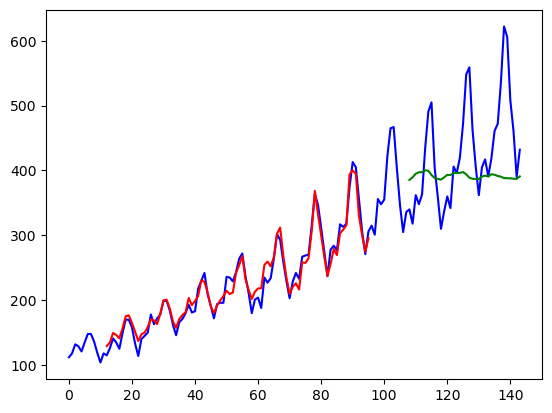

In [15]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()